# Transforming color space RGB to Lab
`Lab`color space consists of three color chanells:
1. `L` channel stands for `luminosity/illumination/intensity(lightness)`
2. `a` channel represent the `green-red` color components
3. `b` channel represent the `blue-yellow` color components

### Converting RGB image into grayscale by setting the Lab space color channels to zero

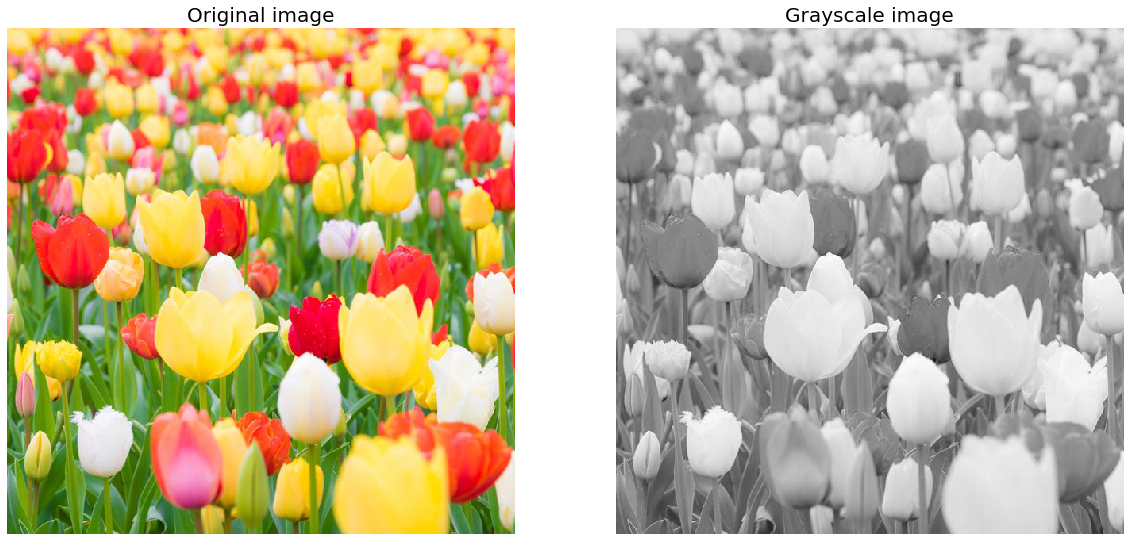

In [4]:
# importing the required libraries
import numpy as np
from skimage.io import imread
from skimage.color import rgb2lab, lab2rgb
import matplotlib.pylab as plt

# RGB to Lab color space
im = imread('Ch1images/flowers.jpg')
im1 = rgb2lab(im)

# set second and third channels to zeros
im1[...,1] = im1[...,2] = 0

# obtain the grayscale image by converting the image back into the RGB color space from the Lab color space
im1 = lab2rgb(im1)

# Plot the input and output images, as shown in the following code
plt.figure(figsize=(20,10))
plt.subplot(121), plt.imshow(im), plt.axis('off'),plt.title('Original image', size=20)
plt.subplot(122), plt.imshow(im1), plt.axis('off'), plt.title('Grayscale image', size=20)
plt.show()


### Changing the brightness of the image by barying the luminosity channel

C:\Users\perpa\anaconda3\lib\site-packages\skimage\color\colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 152885 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


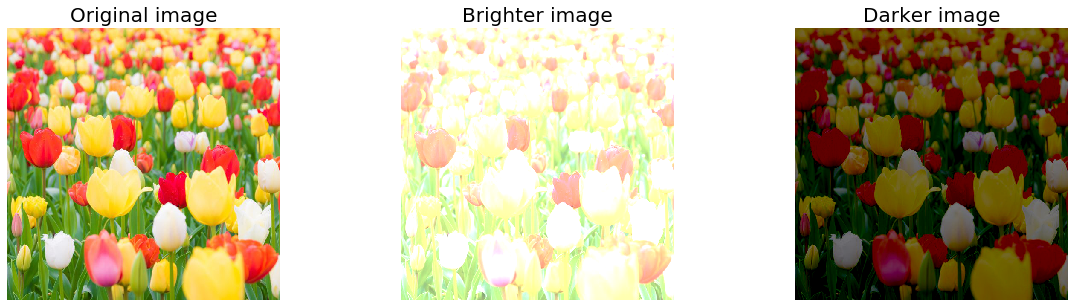

In [5]:
plt.figure(figsize=(20,5))
plt.subplot(131), plt.imshow(im), plt.axis('off'), plt.title('Original image', size=20)

# 1- Convert the input image from RBG into the Lab color space and increase the first channel values by 50
im1 = rgb2lab(im)
im1[...,0] = im1[...,0] + 50
# 2- Convert it back into the RBG color space and obtain a brighter image
im1 = lab2rgb(im1)
plt.subplot(132), plt.imshow(im1), plt.axis('off'), plt.title('Brighter image', size=20)

# 3- Convert the RGB image into to Lab color space and decrease only the first channel values (by 50) and then convert back
#    into the RBG color space to get a darker image instead

im1 = rgb2lab(im)
im1[...,0] = im1[...,0] - 50 
im1 = lab2rgb(im1)

plt.subplot(133), plt.imshow(im1), plt.axis('off'), plt.title('Darker image', size=20)

plt.show()

### Applying affine transformation
An `affine transformation` is a geometric transformation that preserves:
* points,
* straight lines and,
* planes

For every `pixel x` in an image, the affine transformation can be represented by the mapping `(x)-> Mx+b`
* `M` is a linear transform (matrix) and
* `b` is an offset vector

![title](Ch1images/affineTra.png)

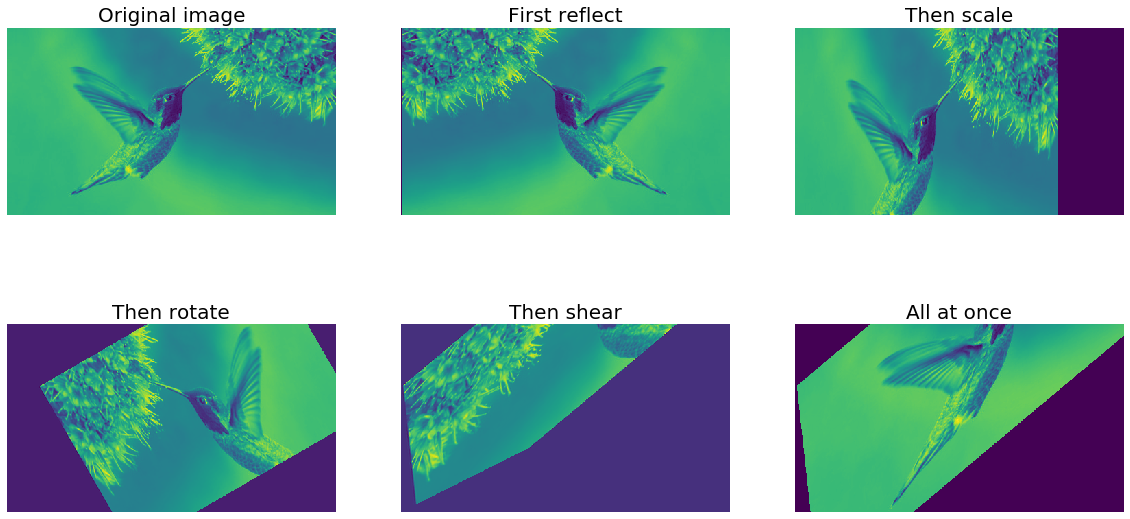

In [8]:
# importing the libraries and the functions requried to implement an affine transforamtion on a grayscale image
import numpy as np
from scipy import ndimage as ndi # apply an affine transformation 
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pylab as plt

# 1- read the color image, convert it into grayscale, and obtain the grayscale image shape
img = rgb2gray(imread('Ch1images/bird.jpg'))
w, h = img.shape

# 2- apply identity transform
M_identity = np.array([[1,0,0],[0,1,0],[0,0,1]])
img1 = ndi.affine_transform(img, M_identity)
plt.figure(figsize=(20,10))
plt.subplot(231), plt.imshow(img1), plt.axis('off'), plt.title('Original image', size=20)


# 3- apply reflection transform (along the x axis)
M_reflect = np.array([[1,0,0],[0,-1,0],[0,0,1]]) @ np.array([[1,0,0],[0,1,-h],[0,0,1]])
img1 = ndi.affine_transform(img, M_reflect) # offset=(0,h)
plt.subplot(232), plt.imshow(img1), plt.axis('off'), plt.title('First reflect', size=20)

# 4- Scale the image (o.75 times along the x-axis and 1.25 times along the y-axis)
s_x, s_y = 0.75, 1.25
M_scale = np.array([[s_x,0,0],[0,s_y,0],[0,0,1]])
img1 = ndi.affine_transform(img, M_scale)
plt.subplot(233), plt.imshow(img1), plt.axis('off'), plt.title('Then scale', size=20)

# 5- Rotate the image by 30 counter-clockwise. It's a composite operation-- first, you will need to shift/center the image,
#    apply rotation, and then apply inverse shift
theta = np.pi/6
M_rotate = np.array([[1,0,w/2],[0,1,h/2],[0,0,1]]) @ np.array([[np.cos(theta),np.sin(theta),0],[np.sin(theta),-np.cos(theta),0],[0,0,1]]) @ np.array([[1,0,-w/2],[0,1,-h/2],[0,0,1]])
img1 = ndi.affine_transform(img1, M_rotate)
plt.subplot(234), plt.imshow(img1), plt.axis('off'), plt.title('Then rotate', size=20) 

# 6- apply shear transform to the image
lambda1 = 0.5
M_shear = np.array([[1,lambda1,0],[lambda1,1,0],[0,0,1]])
img1 = ndi.affine_transform(img1, M_shear)
plt.subplot(235), plt.imshow(img1), plt.axis('off'), plt.title('Then shear', size=20) 

# 7- finally apply all of the transfoms together, in sequence
M_all = M_identity @ M_reflect @ M_scale @ M_rotate @ M_shear
mat_all = ndi.affine_transform(img, M_all)
plt.subplot(236), plt.imshow( mat_all), plt.axis('off'), plt.title('All at once', size=20)
plt.show()

### Creating pencil sketches from images
Producing sketches from images is all about detecting edges in images. You will learn how to use different techniques, including the difference of:
* `Gaussian` (and its extended version, `XDOG`)
* `anisotropic diffusion`, and 
* `dodging` (applying Gaussian blur + invert + thresholding)

to obtain sketches from images. 

C:\Users\perpa\AppData\Roaming\Python\Python37\site-packages\medpy\filter\smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
C:\Users\perpa\AppData\Roaming\Python\Python37\site-packages\medpy\filter\smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)
C:\Users\perpa\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


<Figure size 432x288 with 0 Axes>

C:\Users\perpa\anaconda3\lib\site-packages\matplotlib\image.py:397: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
C:\Users\perpa\anaconda3\lib\site-packages\matplotlib\image.py:398: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
C:\Users\perpa\anaconda3\lib\site-packages\matplotlib\image.py:405: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
C:\Users\perpa\anaconda3\lib\site-packages\matplotlib\image.py:410: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
C:\Users\perpa\anaconda3\lib\site-packages\numpy\ma\core.py:722: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


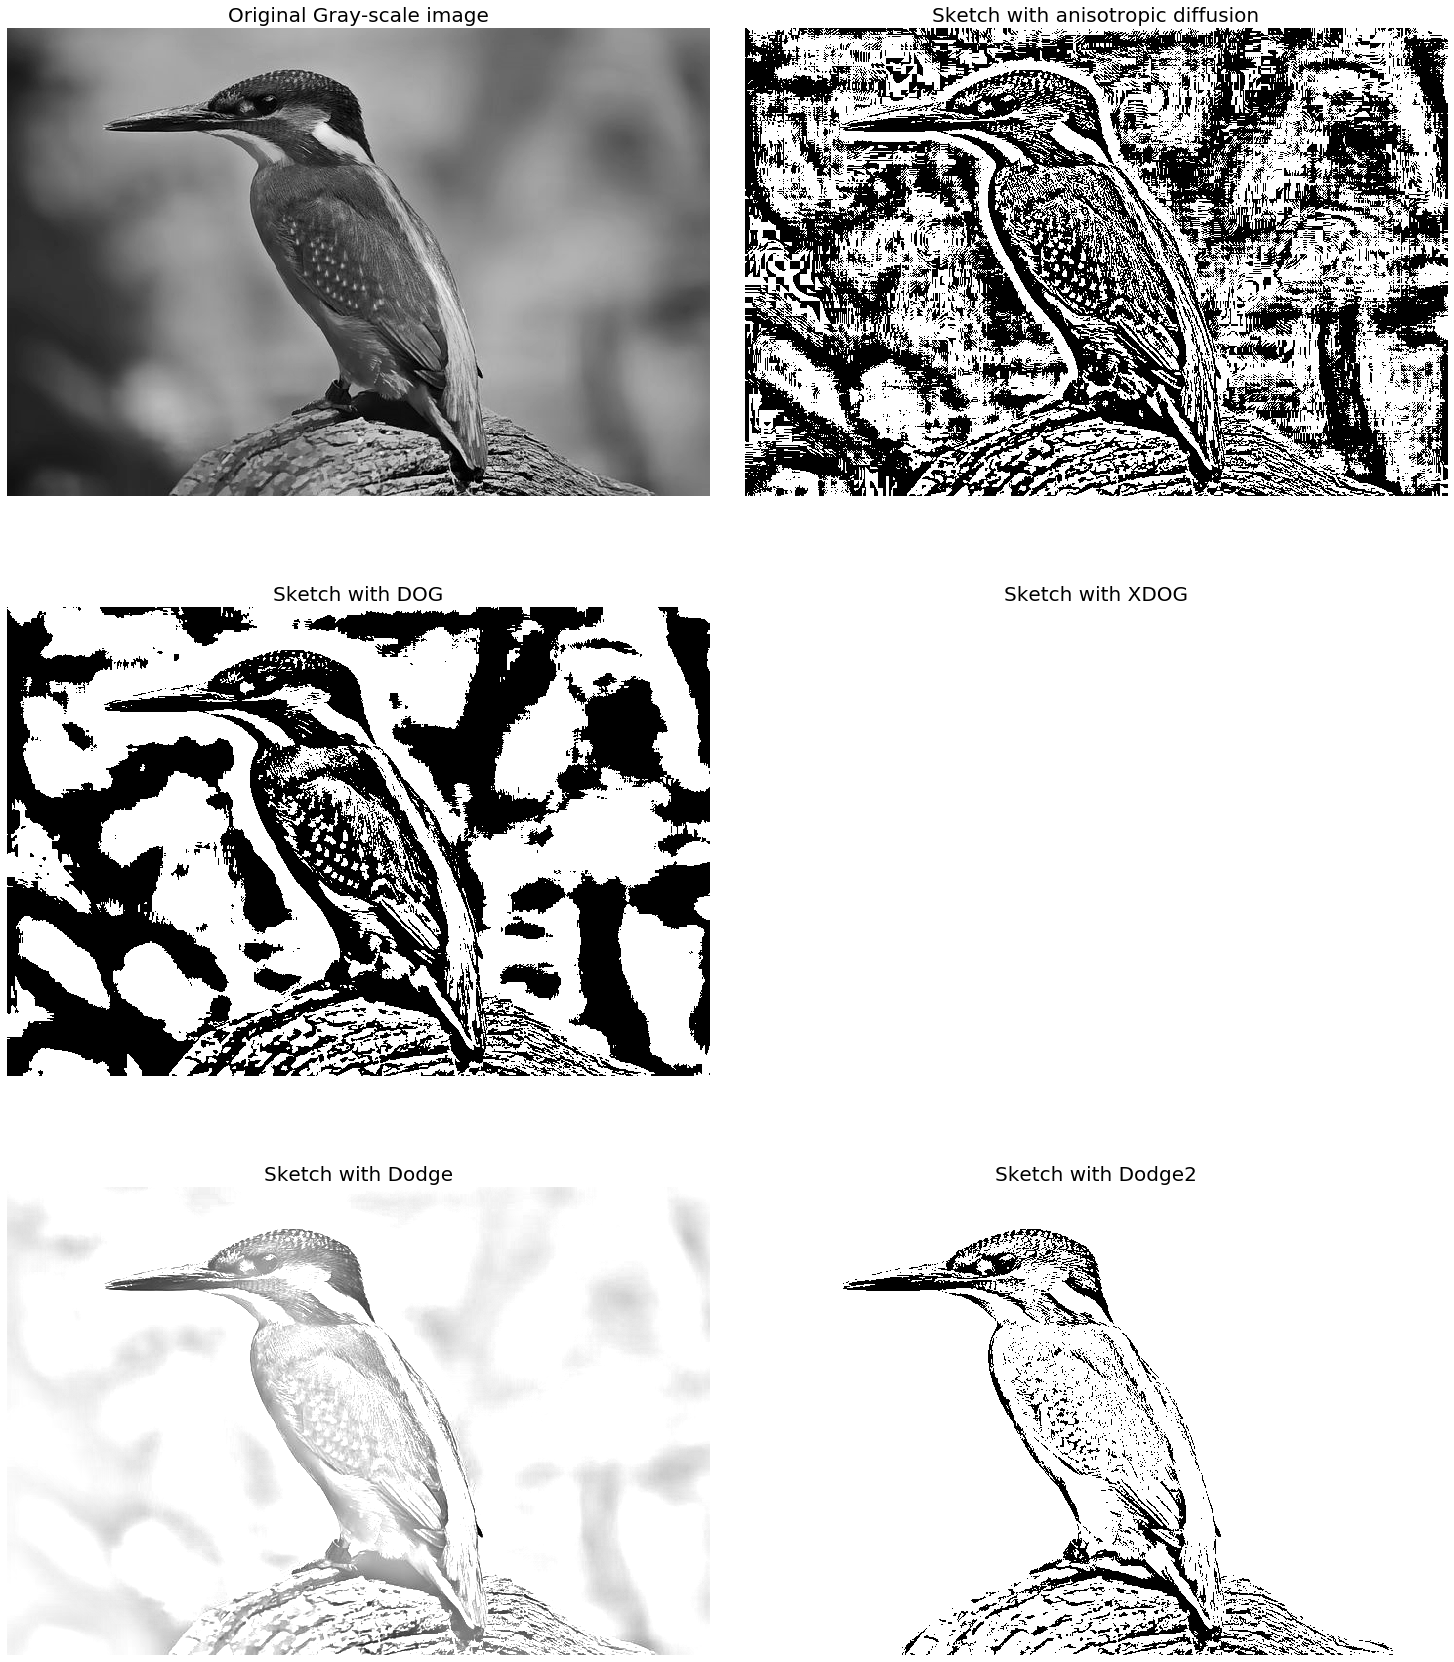

In [11]:
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
from skimage import util
from skimage import img_as_float
import matplotlib.pylab as plt
from medpy.filter.smoothing import anisotropic_diffusion
from skimage.filters import gaussian, threshold_otsu

# 1. Define the normalize() function to implement min-max normalization in an image:
def normalize(img):
    return (img-np.min(img))/(np.max(img)-np.min(img))

# 2. Implement the sketch() function that takes an image and the extracted edges as input:
def sketch(img, edges):
    output = np.multiply(img, edges)
    output[output>1]=1
    output[edges==1]=1
    return output

# 3. Implement a function to extract the edges from an image with anisotropic diffusion:
def edges_with_anisotropic_diffusion(img, niter=100, kappa=10,gamma=0.1):
    output = img - anisotropic_diffusion(img, niter=niter, kappa=kappa, gamma=gamma, voxelspacing=None, option=1)
    output[output > 0] = 1
    output[output < 0] = 0
    return output

# 4. Implement a function to extract the edges from an image with the dodge operation (there are two implementations):
def sketch_with_dodge(img):
    orig = img
    blur = gaussian(util.invert(img), sigma=20)
    result = blur / util.invert(orig)
    result[result>1] = 1
    result[orig==1] = 1
    return result

def edges_with_dodge2(img):
    img_blurred = gaussian(util.invert(img), sigma=5)
    output = np.divide(img, util.invert(img_blurred) + 0.001)
    output = normalize(output)
    thresh = threshold_otsu(output)
    output = output > thresh
    return output

# 5. Implement a function to extract the edges from an image with a Difference of Gaussian (DOG) operation:
def edges_with_DOG(img, k = 200, gamma = 1):
    sigma = 0.5
    output = gaussian(img, sigma=sigma) - gamma*gaussian(img, sigma=k*sigma)
    output[output > 0] = 1
    output[output < 0] = 0
    return output

# 6. Implement a function to produce sketches from an image with an Extended Difference of Gaussian (XDOG) operation:
def sketch_with_XDOG(image, epsilon=0.01):
    phi = 10
    difference = edges_with_DOG(image, 200, 0.98).astype(np.uint8)
    for i in range(0, len(difference)):
        for j in range(0, len(difference[0])):
            if difference[i][j] >= epsilon:
                difference[i][j] = 1
            else:
                ht = np.tanh(phi*(difference[i][j] - epsilon))
            difference[i][j] = 1 + ht
    difference = normalize(difference)
    return difference

def plot_sketches(img_file):
    img = rgb2gray(imread(img_file))
    plt.figure(figsize=(20,25))
    output_aniso = sketch(img, edges_with_anisotropic_diffusion(img))
    output_dog = sketch(img, edges_with_DOG(img, k=25))
    output_xdog = sketch_with_XDOG(img)
    output_dodge = sketch_with_dodge(img)
    output_dodge2 = sketch(img, edges_with_dodge2(img))
    plt.subplots_adjust(left=0, right=1, bottom=0, top=0.95, hspace=0.05, wspace=0.05) 
    plt.subplot(321), plt.imshow(img), plt.axis('off')
    plt.title('Original Gray-scale image', size=20)
    plt.subplot(322), plt.imshow(output_aniso), plt.axis('off')
    plt.title('Sketch with anisotropic diffusion', size=20)
    plt.subplot(323), plt.imshow(output_dog), plt.axis('off')
    plt.title('Sketch with DOG', size=20)
    plt.subplot(324), plt.imshow(output_xdog), plt.axis('off')
    plt.title('Sketch with XDOG', size=20)
    plt.subplot(325), plt.imshow(output_dodge), plt.axis('off')
    plt.title('Sketch with Dodge', size=20)
    plt.subplot(326), plt.imshow(output_dodge2), plt.axis('off')
    plt.title('Sketch with Dodge2', size=20)
    #plt.show()
    #plt.savefig(img_file.split('.')[0] + 'sketches_all.png', bbox_in='tight')

plt.gray()
img = 'images/bird.png'
plot_sketches(img)

### Object detection using color in HSV
In this recipe, you will learn how to detect objects using colors in the `HSV color space` using OpenCV-Python. You need to specify a range of color values by means of wich the object you are interested in will be identified and extracted. You can change the color or the object detected and even make the detected object transparent.

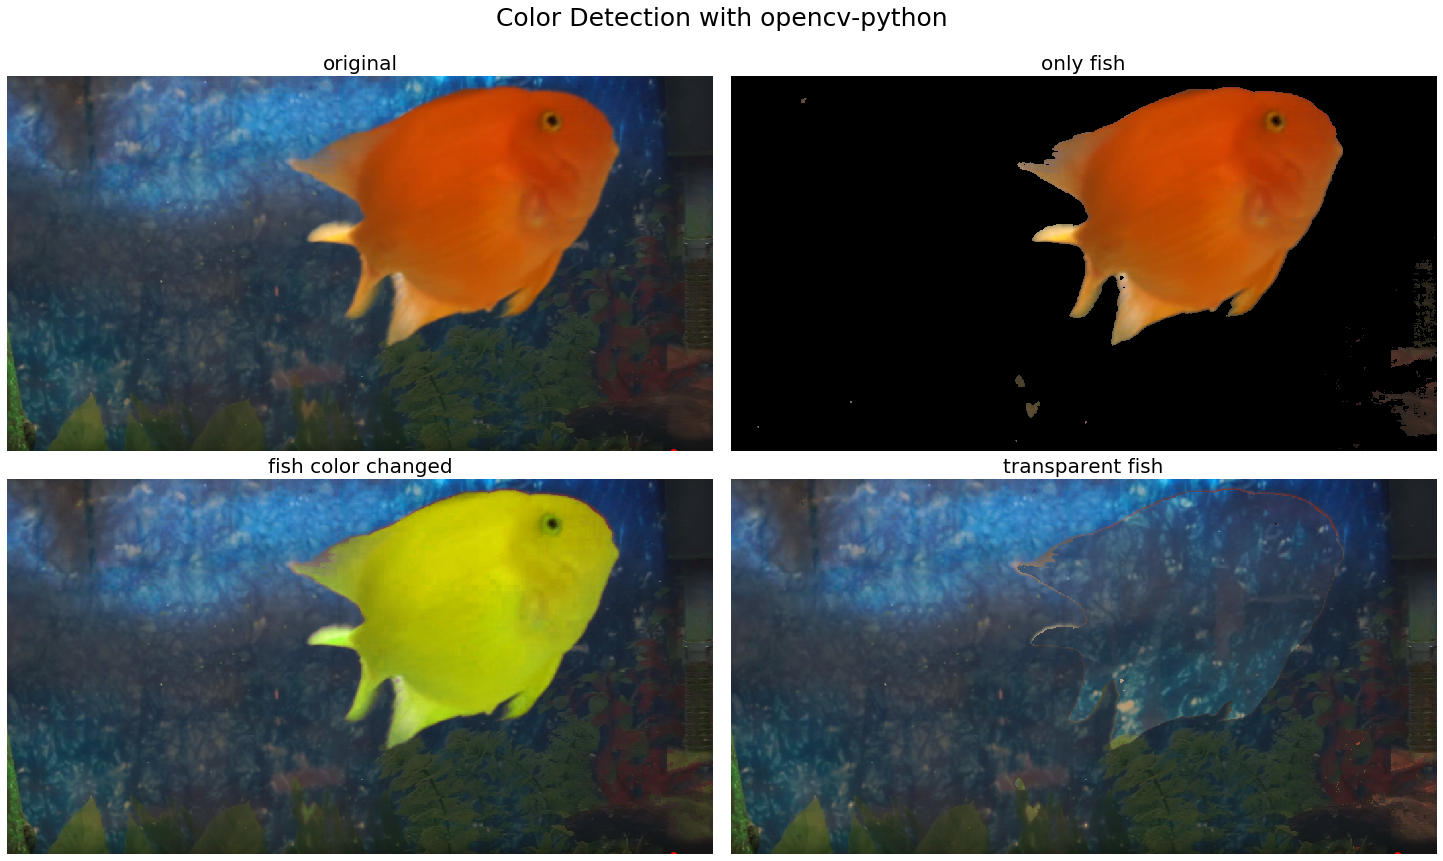

In [15]:
import cv2
import numpy as np
import matplotlib.pylab as plt

# 1. Read the input and background image. Convert the input image from BGR into the HSV color space:
bck = cv2.imread("images/fish_bg.png")
img = cv2.imread("images/fish.png")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# 2. Create a mask for the fish by selecting a possible range of HSV colors that the fish can have:
mask = cv2.inRange(hsv, (5, 75, 25), (25, 255, 255))

# 3. Slice the orange fish using the mask:
imask = mask>0
orange = np.zeros_like(img, np.uint8)
orange[imask] = img[imask]

# 4. Change the color of the orange fish to yellow by changing the hue channel value only (add 20) 
# and converting the image back into the BGR space:
yellow = img.copy()
hsv[...,0] = hsv[...,0] + 20
yellow[imask] = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)[imask]
yellow = np.clip(yellow, 0, 255)

# 5. Finally, create the transparent fish image by first extracting the background
# without the input image with the fish, and then extracting the area
# corresponding to the foreground object (fish) from the background image and
# adding these two images:
bckfish = cv2.bitwise_and(bck, bck, mask=imask.astype(np.uint8))
nofish = img.copy()
nofish = cv2.bitwise_and(nofish, nofish, mask=(np.bitwise_not(imask)).astype(np.uint8))
nofish = nofish + bckfish

plt.figure(figsize=(20,12))
plt.subplots_adjust(0,0,1,0.9,0.01,0.075)
plt.subplot(221), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.axis('off'), plt.title('original', size=20)
plt.subplot(222), plt.imshow(cv2.cvtColor(orange, cv2.COLOR_BGR2RGB)), plt.axis('off'), plt.title('only fish', size=20)
plt.subplot(223), plt.imshow(cv2.cvtColor(yellow, cv2.COLOR_BGR2RGB)), plt.axis('off'), plt.title('fish color changed', size=20)
plt.subplot(224), plt.imshow(cv2.cvtColor(nofish, cv2.COLOR_BGR2RGB)), plt.axis('off'), plt.title('transparent fish', size=20)
plt.suptitle('Color Detection with opencv-python', size=25)
plt.show()

![title](Ch1images/HSVcolor.png)